## Introduction
Customer segmentation is the practice of dividing a customer base into groups of individuals that are similar in specific ways relevant to marketing, such as age, gender, interests and spending habits.
Companies employing customer segmentation operate under the fact that every customer is different and that their marketing efforts would be better served if they target specific, smaller groups with messages that those consumers would find relevant and lead them to buy something. Companies also hope to gain a deeper understanding of their customers' preferences and needs with the idea of discovering what each segment finds most valuable to more accurately tailor marketing materials toward that segment.

Customer segmentation relies on identifying key differentiators that divide customers into groups that can be targeted. Information such as a customers' demographics (age, race, religion, gender, family size, ethnicity, income, education level), geography (where they live and work), psychographic (social class, lifestyle and personality characteristics) and behavioral (spending, consumption, usage and desired benefits) tendencies are taken into account when determining customer segmentation practices.

## Benefits of customer segmentation include:

### Personalisation
Personalisation ensures that you provide exceptional customer experience.

### Customer Retention
It is 16 times as costly to build a long-term business relationship with a new customer than simply to cultivate the loyalty of an existing customer.

### Better ROI for marketing
Affirmations that right marketing messages are sent to the right people based on their life cycle stage.

### Reveal new opportunities
Customer segmentation may reveal new trends about products and it may even give the first mover’s advantage in a product segment.

## Approach - Machine Learning
Unsupervised Learning is a class of Machine Learning techniques to find the patterns in data. The data given to unsupervised algorithm are not labelled, which means only the input variables(X) are given with no corresponding output variables. In unsupervised learning, the algorithms are left to themselves to discover interesting structures in the data.
There are some analytics techniques that can help you with segmenting your customers. These are useful especially when you have a large number of customers and it’s hard to discover patterns in your customer data just by looking at transactions. The two most common ones are:

### Clustering
Clustering is an exploration technique for datasets where relationships between different observations may be too hard to spot with the eye.
### Principal Component Analysis (PCA)
PCA is a statistical procedure that uses an orthogonal transformation to convert a set of observations of possibly correlated variables (entities each of which takes on various numerical values) into a set of values of linearly uncorrelated variables called principal components.
The following code takes advantage of the Mall Customer Segmentation Data to demonstrate the ability of K-Means clustering algorithm to identify customer's segments.

*import Libraries*

In [36]:
#kmeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


## 2. **Data Loading and exploration and cleaning**
 ↪ Load the csv file with pandas 

 ↪ creating the dataframe and understanding the data present in the dataset using pandas
 
 ↪ Dealing with the missing data, outliers and the incorrect records
 

In [5]:
df = pd.read_csv('./Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Observations :
---
- WE have just 200 rows and 5 columns 
- Just one column is object data type 
- There is no null values
  
--- 
- Start the **Exploratory Data Analysis**.

- Verifying that there are no duplicated ID's presented in the dataset to ensure correcteness

In [9]:
df.duplicated().sum()

0

In [10]:
df['CustomerID'].nunique()

200

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,200.0,100.50,57.879185,1.0,50.75,100.5,150.25,200.0
Age,200.0,38.85,13.969007,18.0,28.75,36.0,49.00,70.0
Annual Income (k$),200.0,60.56,26.264721,15.0,41.50,61.5,78.00,137.0
Spending Score (1-100),200.0,50.20,25.823522,1.0,34.75,50.0,73.00,99.0


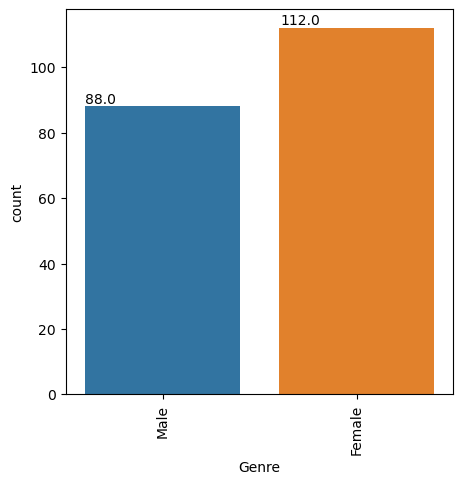

In [12]:
plt.figure(figsize = (5,5))
gender = df['Genre'].sort_values(ascending = False)
ax = sns.countplot(x='Genre', data= df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))
plt.xticks(rotation=90)
plt.show()

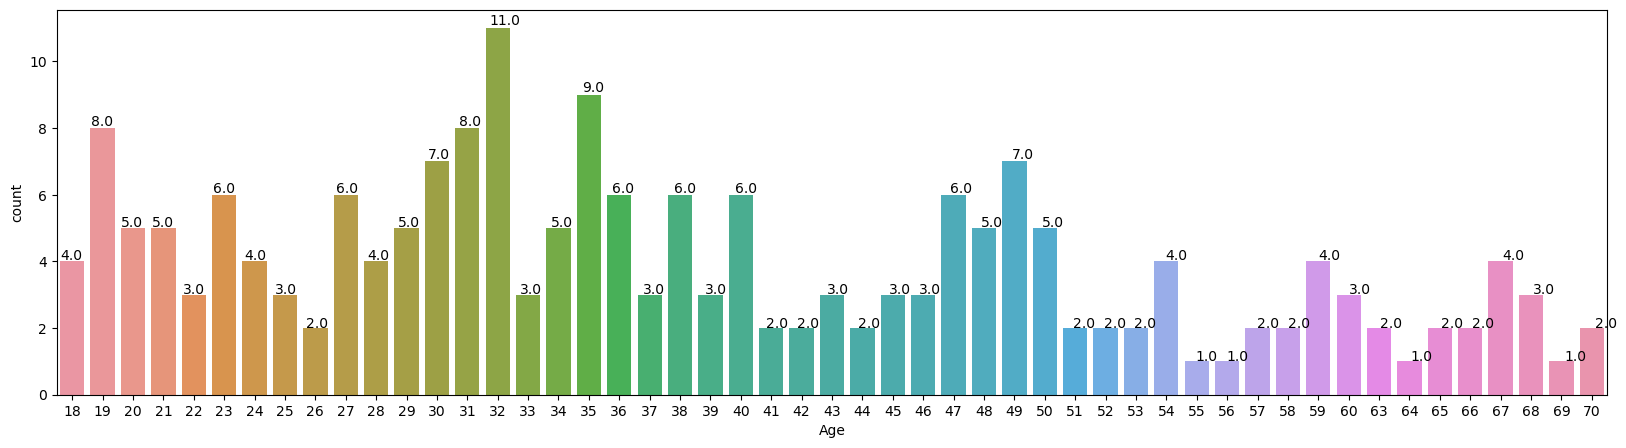

In [13]:
plt.figure(figsize = (20,5))
gender = df['Age'].sort_values(ascending = False)
ax = sns.countplot(x='Age', data= df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))

plt.show()

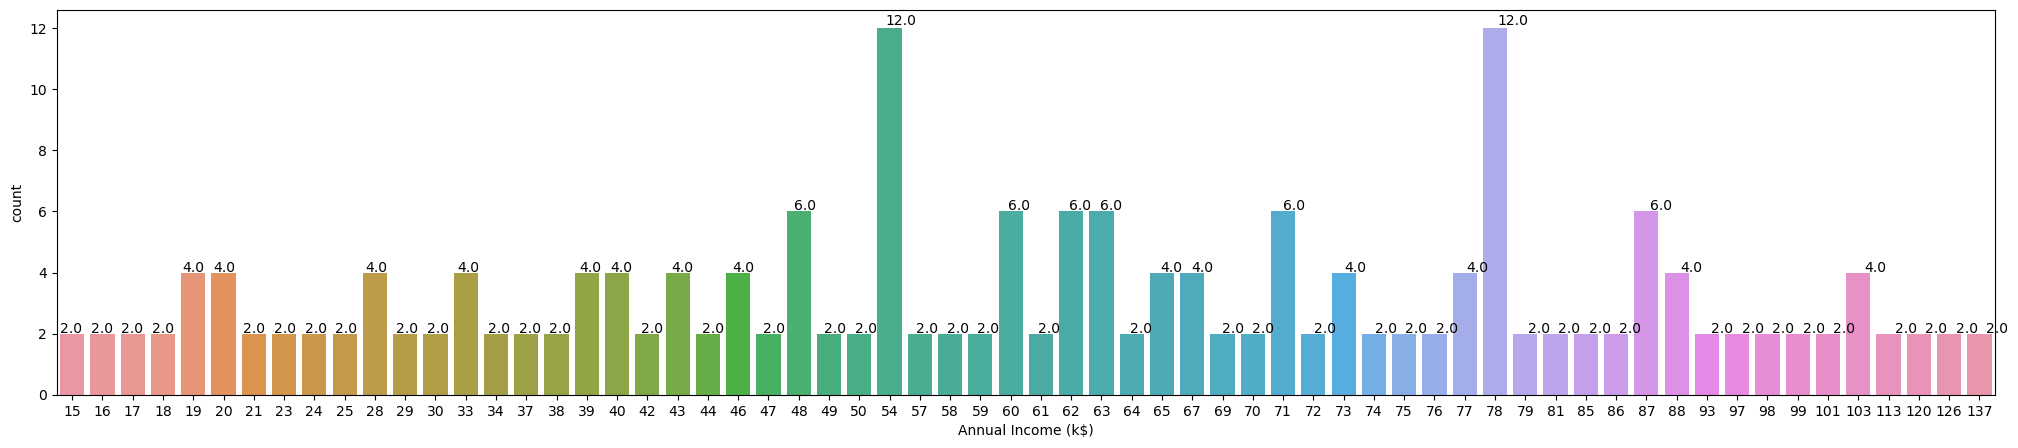

In [14]:
plt.figure(figsize = (25,5))
gender = df['Annual Income (k$)'].sort_values(ascending = False)
ax = sns.countplot(x='Annual Income (k$)', data= df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))

plt.show()

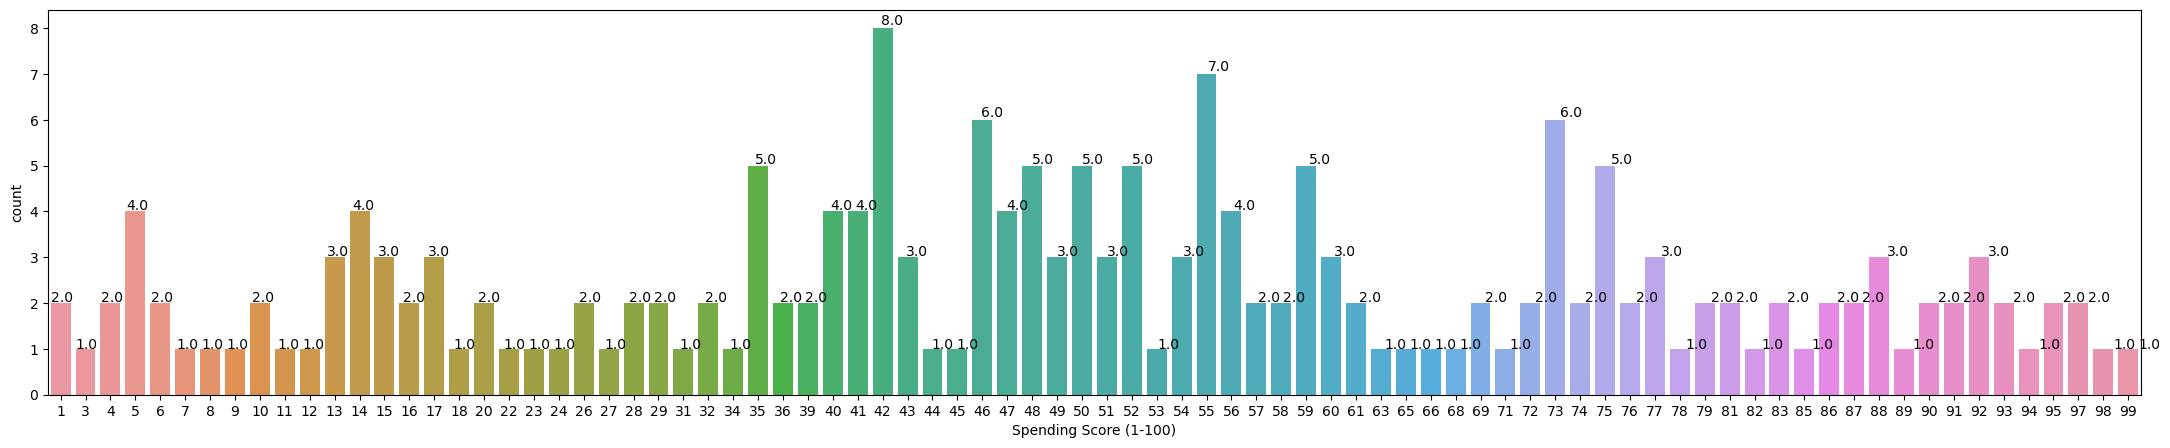

In [15]:
plt.figure(figsize = (27,5))
gender = df['Spending Score (1-100)'].sort_values(ascending = False)
ax = sns.countplot(x='Spending Score (1-100)', data= df)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01 , p.get_height() * 1.01))

plt.show()

C:\Users\dell\AppData\Local\Temp\ipykernel_6180\3395093691.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True, cmap="rainbow")


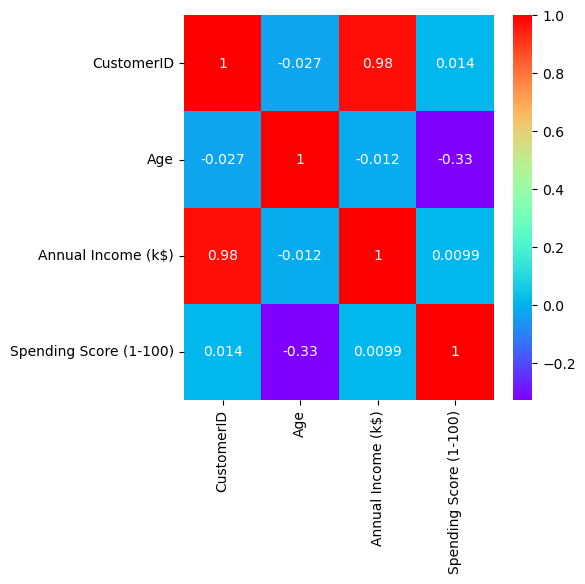

In [16]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (5,5))
sns.heatmap(df.corr(), annot = True, cmap="rainbow")
plt.savefig('Correlation')
plt.show()

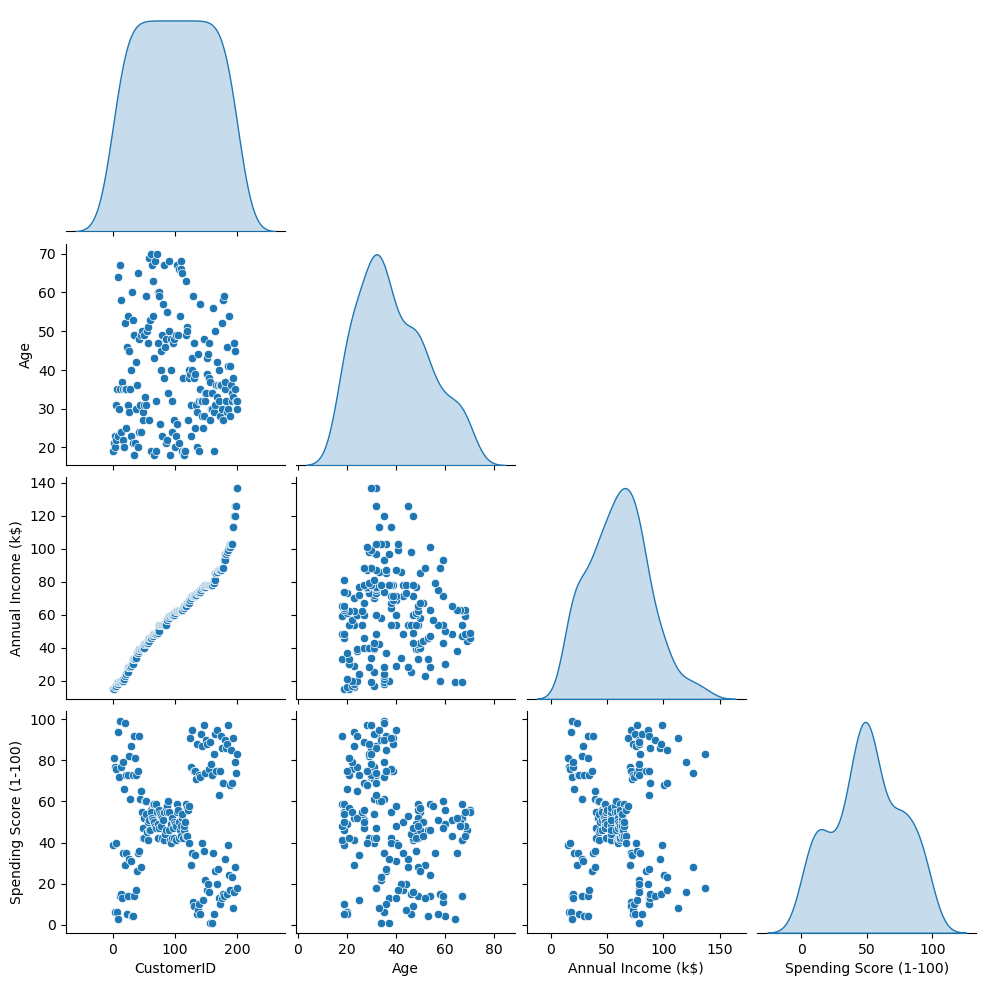

In [17]:
sns.pairplot(df,corner=True,diag_kind="kde")
plt.show()

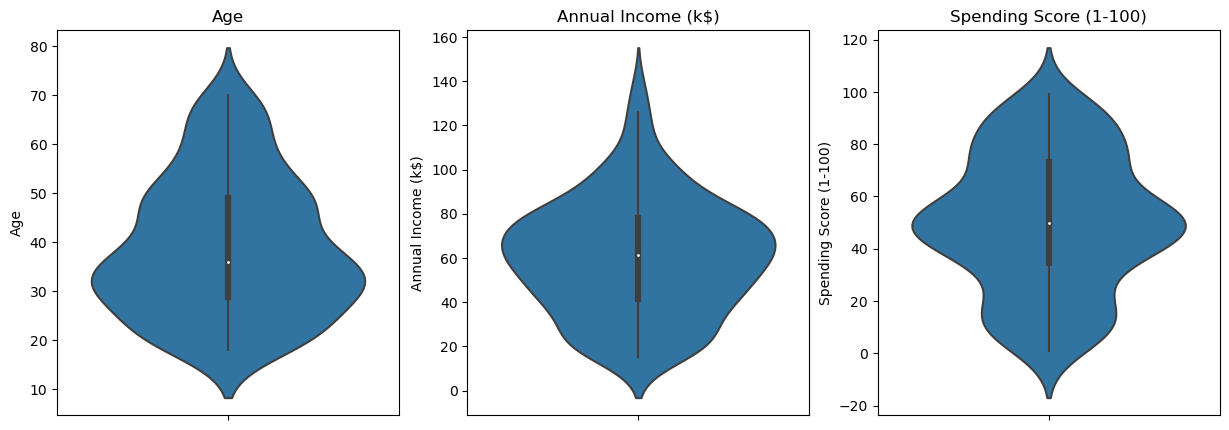

In [18]:
f, axes = plt.subplots(1,3, figsize=(15,5))
s=sns.violinplot(y=df.Age,ax=axes[0])
axes[0].set_title('Age')
s=sns.violinplot(y=df['Annual Income (k$)'],ax=axes[1])
axes[1].set_title('Annual Income (k$)')
s=sns.violinplot(y=df['Spending Score (1-100)'],ax=axes[2])
axes[2].set_title('Spending Score (1-100)')
plt.show()


In [19]:
Q3 = df['Annual Income (k$)'].quantile(0.99)
Q1 = df['Annual Income (k$)'].quantile(0.01)
df['Annual Income (k$)'][df['Annual Income (k$)']<=Q1]=Q1
df['Annual Income (k$)'][df['Annual Income (k$)']>=Q3]=Q3

C:\Users\dell\AppData\Local\Temp\ipykernel_6180\3020664898.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Annual Income (k$)'][df['Annual Income (k$)']<=Q1]=Q1


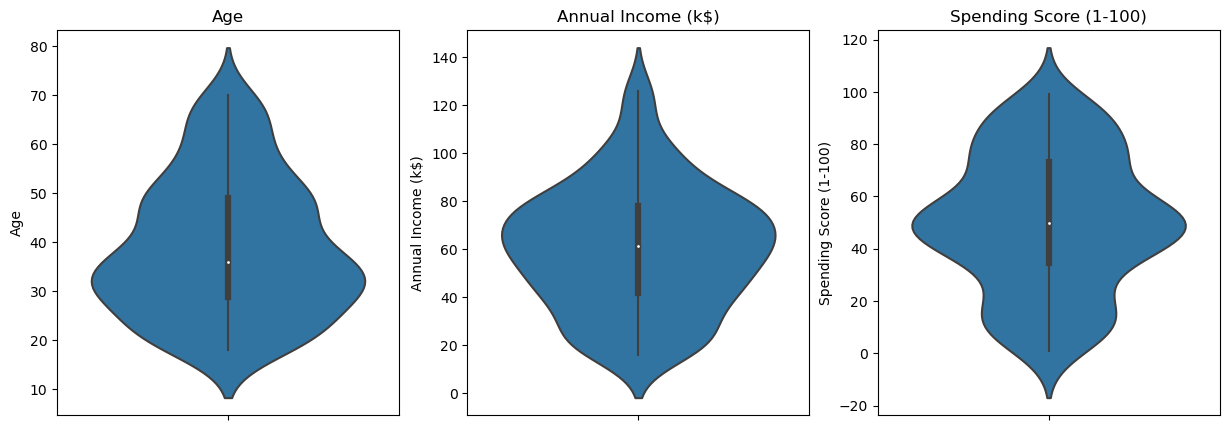

In [20]:
f, axes = plt.subplots(1,3, figsize=(15,5))
s=sns.violinplot(y=df.Age,ax=axes[0])
axes[0].set_title('Age')
s=sns.violinplot(y=df['Annual Income (k$)'],ax=axes[1])
axes[1].set_title('Annual Income (k$)')
s=sns.violinplot(y=df['Spending Score (1-100)'],ax=axes[2])
axes[2].set_title('Spending Score (1-100)')
plt.show()

In [27]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.461000,50.200000
std,57.879185,13.969007,25.949731,25.823522
min,1.000000,18.000000,15.990000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,126.110000,99.000000


## 3. Select Features for Clustering

- We’ll usually pick Annual Income and Spending Score for better visualization.

In [31]:
# columns: Annual Income & Spending Score
X = df.iloc[:, [3, 4]].values

## 4. Find Optimal Number of Clusters (Elbow Method)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

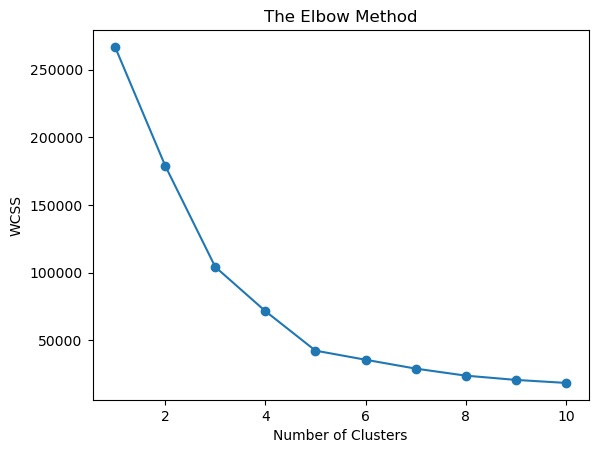

In [32]:
wcss = []   # within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot
plt.plot(range(1, 11), wcss, marker="o")
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


- The “elbow” point usually suggests the best k (often 5).

---
## 5. Apply K-Means with Optimal k

In [33]:
# Apply K-Means with Optimal k
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(X)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


## 6. Visualize Clusters

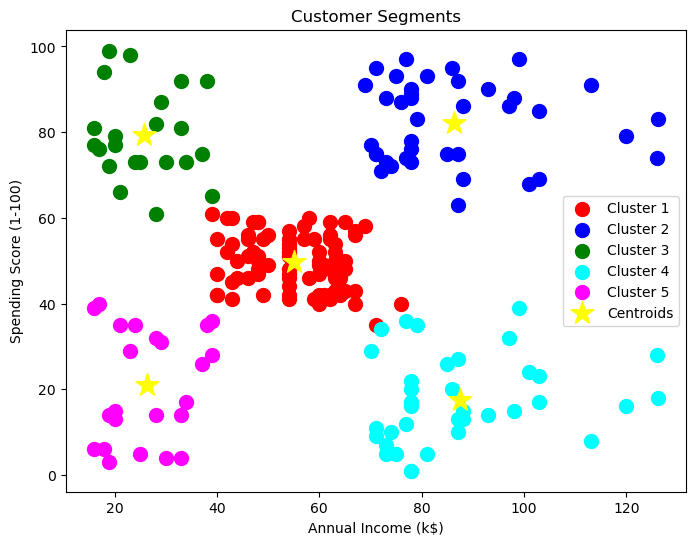

In [34]:
plt.figure(figsize=(8,6))
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c="red", label="Cluster 1")
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c="blue", label="Cluster 2")
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c="green", label="Cluster 3")
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c="cyan", label="Cluster 4")
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c="magenta", label="Cluster 5")

# Centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c="yellow", marker="*", label="Centroids")

plt.title("Customer Segments")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()


## Using PCA for Visualization

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


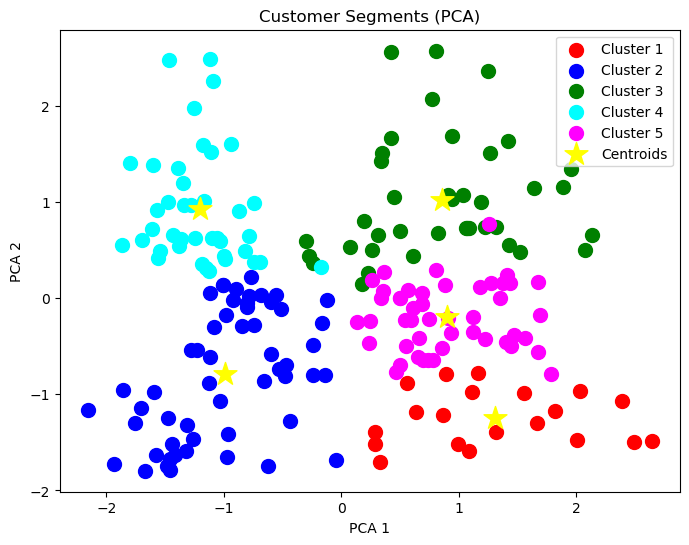

In [37]:
# Select features
X = df.iloc[:, [2, 3, 4]].values   # Age, Annual Income, Spending Score

# Standardize (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means
kmeans = KMeans(n_clusters=5, init="k-means++", random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot PCA results
plt.figure(figsize=(8,6))
plt.scatter(X_pca[y_kmeans==0, 0], X_pca[y_kmeans==0, 1], s=100, c="red", label="Cluster 1")
plt.scatter(X_pca[y_kmeans==1, 0], X_pca[y_kmeans==1, 1], s=100, c="blue", label="Cluster 2")
plt.scatter(X_pca[y_kmeans==2, 0], X_pca[y_kmeans==2, 1], s=100, c="green", label="Cluster 3")
plt.scatter(X_pca[y_kmeans==3, 0], X_pca[y_kmeans==3, 1], s=100, c="cyan", label="Cluster 4")
plt.scatter(X_pca[y_kmeans==4, 0], X_pca[y_kmeans==4, 1], s=100, c="magenta", label="Cluster 5")

# Plot centroids
centroids_pca = pca.transform(kmeans.cluster_centers_)
plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], s=300, c="yellow", marker="*", label="Centroids")

plt.title("Customer Segments (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()

## Using t-SNE for Visualization

- t-SNE captures non-linear relationships better than PCA.

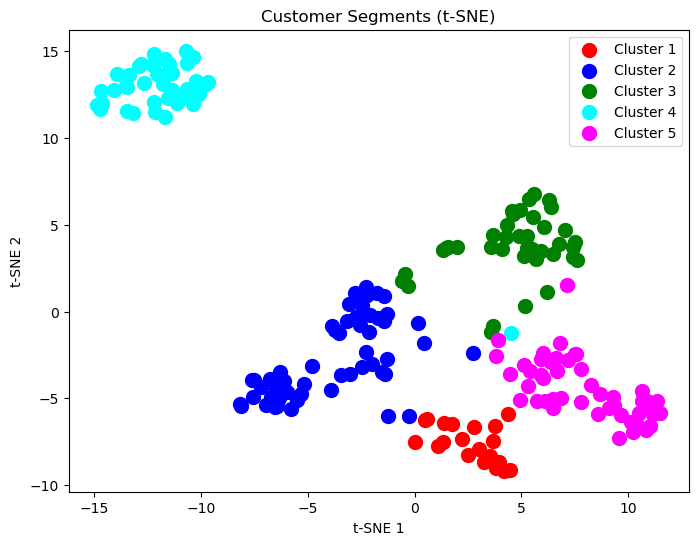

In [ ]:

from sklearn.manifold import TSNE

# Apply t-SNE (reduce to 2D)
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

# Plot t-SNE results
plt.figure(figsize=(8,6))
plt.scatter(X_tsne[y_kmeans==0, 0], X_tsne[y_kmeans==0, 1], s=100, c="red", label="Cluster 1")
plt.scatter(X_tsne[y_kmeans==1, 0], X_tsne[y_kmeans==1, 1], s=100, c="blue", label="Cluster 2")
plt.scatter(X_tsne[y_kmeans==2, 0], X_tsne[y_kmeans==2, 1], s=100, c="green", label="Cluster 3")
plt.scatter(X_tsne[y_kmeans==3, 0], X_tsne[y_kmeans==3, 1], s=100, c="cyan", label="Cluster 4")
plt.scatter(X_tsne[y_kmeans==4, 0], X_tsne[y_kmeans==4, 1], s=100, c="magenta", label="Cluster 5")

plt.title("Customer Segments (t-SNE)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend()
plt.show()

🔑 Key Differences:

PCA → Linear reduction, faster, shows overall variance.

t-SNE → Non-linear, better at capturing hidden structures, but slower.

## Suggested Marketing Strategies per Cluster

---
### Cluster 1 – Low Income, Low Spending (e.g., “Frugal Customers”)

- **Profile:** Customers with limited purchasing power and low engagement.

- **Strategy:**

    - Offer affordable product bundles and discounts.

    - Use loyalty programs (points, rewards for repeat purchases).

    - Send personalized offers during sales seasons.

---
## Cluster 2 – High Income, High Spending (e.g., “Premium Customers”)

- **Profile:** Wealthy customers who frequently spend a lot.

- **Strategy:**

    - Focus on exclusive offers (VIP memberships, limited editions).

    - Provide premium customer service (priority support, personalized shopping).

    - Offer luxury upgrades and early access to new collections.

---
### Cluster 3 – High Income, Low Spending (e.g., “Potential Shoppers”)

- **Profile:** Customers with strong buying capacity but low actual spending.

- **Strategy:**

    - Use targeted advertising to showcase value and exclusivity.

    - Offer personalized recommendations (based on browsing history).

    - Provide trial experiences or free samples to encourage spending.

---
### Cluster 4 – Low Income, High Spending (e.g., “Aspirational Customers”)

- **Profile:** Budget-limited but willing to spend disproportionately.

- **Strategy:**

    - Promote affordable luxury products.

    - Offer flexible payment options (installments, EMI, BNPL).

    - Build community-driven marketing (social media campaigns, aspirational branding).

---
### Cluster 5 – Average Income & Spending (e.g., “Middle Class Regulars”)

- **Profile:** Balanced customers who shop moderately.

- Strategy:

    - Focus on retention via seasonal promotions.

    - Provide cross-sell / upsell offers (e.g., buy 2 get 1 free).

    - Build brand loyalty with referral programs.